In [12]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [13]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python import pywrap_tensorflow

In [15]:
import os
# Define the base path correctly
base_path = r"E:\Techathon_672\images"

# Update paths for train, validation, and test sets
train_path = os.path.join(base_path, "TRAIN")
valid_path = os.path.join(base_path, "TEST")
test_path = os.path.join(base_path, "TEST_SIMPLE")

# Print paths to verify
print("Train Path:", train_path)
print("Validation Path:", valid_path)
print("Test Path:", test_path)

Train Path: E:\Techathon_672\images\TRAIN
Validation Path: E:\Techathon_672\images\TEST
Test Path: E:\Techathon_672\images\TEST_SIMPLE


In [16]:
# function is used to create an image dataset from a directory structure where images are organized into subdirectories representing class labels
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,=
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 9957 files belonging to 4 classes.


In [17]:
# Get the class labels
labels = training_set.class_names
print(labels)


['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']


In [18]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 2487 files belonging to 4 classes.


In [19]:
import tensorflow as tf

cnn = tf.keras.models.Sequential()

# Block 1
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Block 2
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Block 3 (Removed Redundant Input Shape)
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Block 4
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Block 5
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Dropout for Regularization
cnn.add(tf.keras.layers.Dropout(0.4))

# Flattening & Fully Connected Layers
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1024, activation='relu'))  # Reduced from 1500
cnn.add(tf.keras.layers.Dropout(0.5))

# Output Layer
cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))  # Ensure categorical_crossentropy loss



In [20]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])



In [21]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 batch_normalization_5 (Batc  (None, 126, 126, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)       

In [22]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=50)

Epoch 1/50
312/312 [==============================] - 33s 96ms/step - loss: 1.9216 - accuracy: 0.3594 - val_loss: 2.0469 - val_accuracy: 0.2891
Epoch 2/50
312/312 [==============================] - 28s 91ms/step - loss: 0.7123 - accuracy: 0.6990 - val_loss: 0.9317 - val_accuracy: 0.6663
Epoch 3/50
312/312 [==============================] - 29s 92ms/step - loss: 0.3477 - accuracy: 0.8613 - val_loss: 4.1098 - val_accuracy: 0.5175
Epoch 4/50
312/312 [==============================] - 29s 92ms/step - loss: 0.2135 - accuracy: 0.9157 - val_loss: 1.1069 - val_accuracy: 0.7362
Epoch 5/50
312/312 [==============================] - 29s 92ms/step - loss: 0.1402 - accuracy: 0.9492 - val_loss: 1.5123 - val_accuracy: 0.6667
Epoch 6/50
312/312 [==============================] - 29s 92ms/step - loss: 0.1131 - accuracy: 0.9580 - val_loss: 2.0068 - val_accuracy: 0.6976
Epoch 7/50
312/312 [==============================] - 29s 92ms/step - loss: 0.0787 - accuracy: 0.9716 - val_loss: 3.0125 - val_accuracy:

In [23]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)


312/312 [==============================] - 9s 28ms/step - loss: 1.4636 - accuracy: 0.8440
Training accuracy: 0.8440293073654175


In [24]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

78/78 [==============================] - 2s 25ms/step - loss: 3.0549 - accuracy: 0.7925
Validation accuracy: 0.7925211191177368


In [25]:
cnn.save(r"E:\Techathon_672\trained_cancer_model.h5")

In [26]:
training_history.history

{'loss': [1.9215737581253052,
  0.7122700214385986,
  0.34770405292510986,
  0.21352693438529968,
  0.1401863545179367,
  0.1130586713552475,
  0.07874557375907898,
  0.05263039469718933,
  0.05225537344813347,
  0.06771250069141388,
  0.05910450220108032,
  0.03333820402622223,
  0.08593086898326874,
  0.025375379249453545,
  0.033358678221702576,
  0.05647473782300949,
  0.034230493009090424,
  0.01841462217271328,
  0.06265108287334442,
  0.015024189837276936,
  0.04819077253341675,
  0.018317678943276405,
  0.014469964429736137,
  0.028532426804304123,
  0.013026716187596321,
  0.03678484633564949,
  0.020677806809544563,
  0.01581880822777748,
  0.020495345816016197,
  0.03793518245220184,
  0.03068205527961254,
  0.036016661673784256,
  0.03473777696490288,
  0.02362080290913582,
  0.006620769854635,
  0.003589492291212082,
  0.006535590626299381,
  0.03714997321367264,
  0.024328865110874176,
  0.007151458878070116,
  0.004069081973284483,
  0.022132551297545433,
  0.03026288747

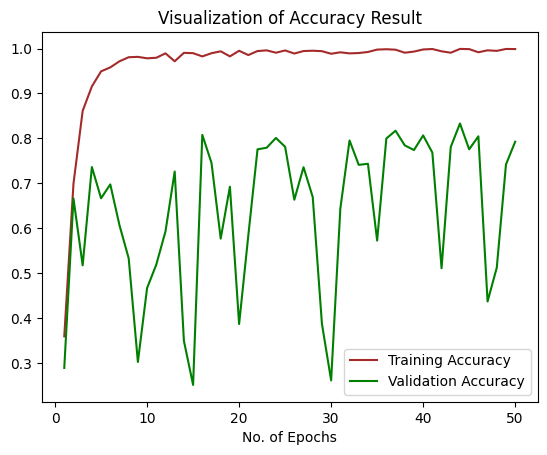

In [27]:
epochs = [i for i in range(1,51)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()